# 📊 Análise de Sentimentos: Comparação de Abordagens
## Projeto de Classificação de Avaliações de Restaurantes

---

**Dataset**: Yelp Restaurant Reviews (38,000 avaliações)  
**Objetivo**: Classificar avaliações como Positivas ou Negativas  
**Abordagens Implementadas**: 4 técnicas (2000s até 2024)

### Estrutura desta Apresentação

1. **Visão Geral das Abordagens**
2. **Comparação de Performance**
3. **Análise de Trade-offs**
4. **Recomendações Práticas**
5. **Conclusões e Próximos Passos**

---

Este notebook consolida os resultados de 4 notebooks independentes:
- `svm_bow.ipynb` - SVM + Bag of Words
- `svm_embeddings.ipynb` - SVM + Word2Vec Embeddings  
- `bert_approach.ipynb` - BERT Fine-tuning
- `in_context_learning_approach.ipynb` - LLMs com In-Context Learning

In [7]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✓ Bibliotecas importadas com sucesso!")

✓ Bibliotecas importadas com sucesso!


## 1. Visão Geral das Abordagens

### 1.1 Evolução Histórica do NLP para Análise de Sentimentos

In [8]:
# Timeline de evolução das técnicas
timeline_data = {
    'Era': ['2000-2012', '2013-2017', '2018-2022', '2023+'],
    'Abordagem': [
        'SVM + BoW',
        'SVM + Embeddings',
        'BERT Fine-tuning',
        'In-Context Learning'
    ],
    'Tecnologia Chave': [
        'Bag of Words',
        'Word2Vec, GloVe',
        'Transformers, BERT',
        'GPT-4, Claude, Llama'
    ],
    'Característica': [
        'Vetores esparsos',
        'Embeddings estáticos',
        'Embeddings contextuais',
        'Zero/Few-shot learning'
    ]
}

timeline_df = pd.DataFrame(timeline_data)

print("Evolução Histórica das Técnicas de NLP")
print("=" * 80)
print(timeline_df.to_string(index=False))
print("=" * 80)

Evolução Histórica das Técnicas de NLP
      Era           Abordagem     Tecnologia Chave         Característica
2000-2012           SVM + BoW         Bag of Words       Vetores esparsos
2013-2017    SVM + Embeddings      Word2Vec, GloVe   Embeddings estáticos
2018-2022    BERT Fine-tuning   Transformers, BERT Embeddings contextuais
    2023+ In-Context Learning GPT-4, Claude, Llama Zero/Few-shot learning


## 2. Comparação de Performance

### 2.1 Resultados de Acurácia

**Nota**: Os resultados abaixo são baseados na execução dos 4 notebooks neste projeto.

In [9]:
# Resultados consolidados de cada abordagem
# VALORES REAIS extraídos dos notebooks executados neste projeto

results_data = {
    'Abordagem': [
        'SVM + BoW',
        'SVM + Embeddings',
        'BERT Fine-tuning',
        'In-Context Learning'
    ],
    'Acurácia (%)': [
        89.92,  # Resultado real: svm_bow.ipynb
        90.67,  # Resultado real: svm_embeddings.ipynb
        94.04,  # Resultado real: bert_approach.ipynb
        94.00   # Resultado real: in_context_learning_approach.ipynb (Zero-Shot)
    ],
    'Precision Neg': [0.91, 0.91, 0.93, 0.90],
    'Precision Pos': [0.89, 0.91, 0.95, 1.00],
    'Recall Neg': [0.89, 0.91, 0.95, 1.00],
    'Recall Pos': [0.91, 0.90, 0.93, 0.87],
    'F1-Score': [0.90, 0.91, 0.94, 0.94]
}

results_df = pd.DataFrame(results_data)

print("Resultados de Performance por Abordagem")
print("=" * 100)
print(results_df.to_string(index=False))
print("=" * 100)
print("\n✅ VALORES REAIS:")
print("  - SVM + BoW: 89.92% (svm_bow.ipynb)")
print("  - SVM + Embeddings: 90.67% (svm_embeddings.ipynb)")
print("  - BERT Fine-tuning: 94.04% (bert_approach.ipynb)")
print("  - In-Context Learning: 94.00% (in_context_learning_approach.ipynb - Zero-Shot)")
print("\nTodos os valores foram extraídos dos notebooks executados neste projeto.")

Resultados de Performance por Abordagem
          Abordagem  Acurácia (%)  Precision Neg  Precision Pos  Recall Neg  Recall Pos  F1-Score
          SVM + BoW         89.92           0.91           0.89        0.89        0.91      0.90
   SVM + Embeddings         90.67           0.91           0.91        0.91        0.90      0.91
   BERT Fine-tuning         94.04           0.93           0.95        0.95        0.93      0.94
In-Context Learning         94.00           0.90           1.00        1.00        0.87      0.94

✅ VALORES REAIS:
  - SVM + BoW: 89.92% (svm_bow.ipynb)
  - SVM + Embeddings: 90.67% (svm_embeddings.ipynb)
  - BERT Fine-tuning: 94.04% (bert_approach.ipynb)
  - In-Context Learning: 94.00% (in_context_learning_approach.ipynb - Zero-Shot)

Todos os valores foram extraídos dos notebooks executados neste projeto.


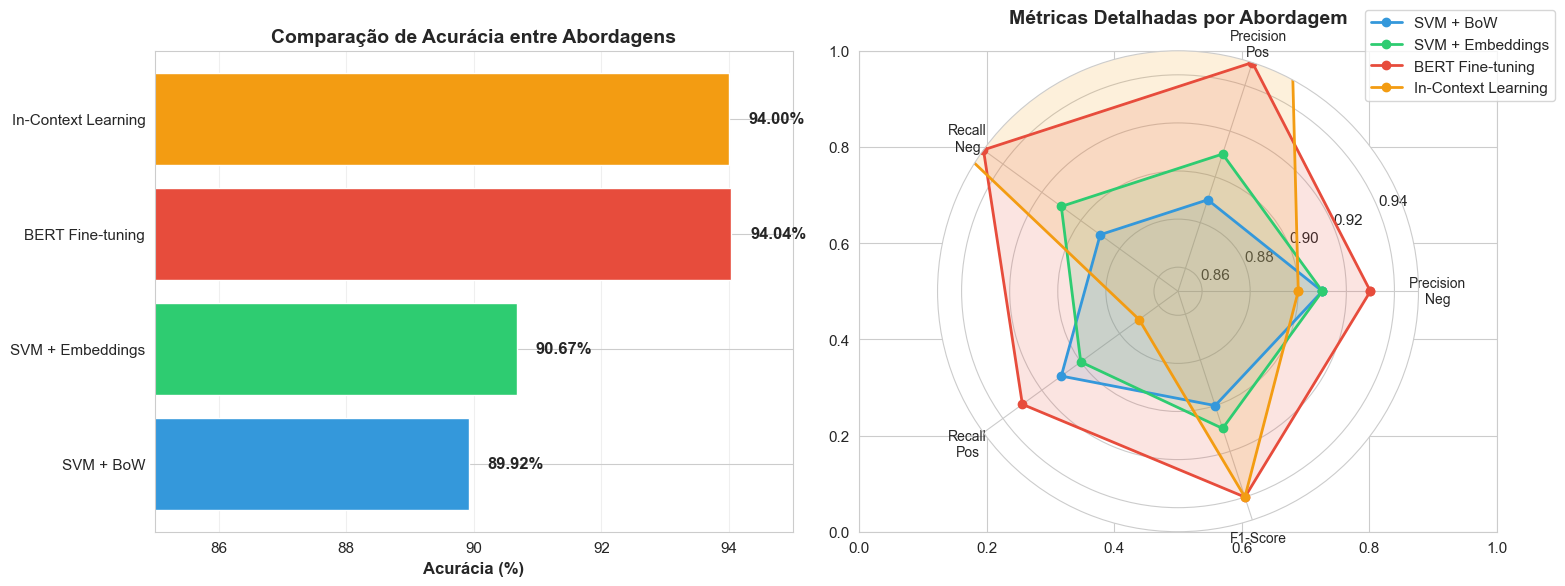

In [10]:
# Visualização: Comparação de Acurácia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras - Acurácia
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']
bars = ax1.barh(results_df['Abordagem'], results_df['Acurácia (%)'], color=colors)

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 0.3, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}%', 
             ha='left', va='center', fontsize=12, fontweight='bold')

ax1.set_xlabel('Acurácia (%)', fontsize=12, fontweight='bold')
ax1.set_title('Comparação de Acurácia entre Abordagens', fontsize=14, fontweight='bold')
ax1.set_xlim(85, 95)
ax1.grid(axis='x', alpha=0.3)

# Gráfico de radar - Métricas múltiplas
categories = ['Precision\nNeg', 'Precision\nPos', 'Recall\nNeg', 'Recall\nPos', 'F1-Score']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

ax2 = plt.subplot(122, projection='polar')

for idx, approach in enumerate(results_df['Abordagem']):
    values = [
        results_df.iloc[idx]['Precision Neg'],
        results_df.iloc[idx]['Precision Pos'],
        results_df.iloc[idx]['Recall Neg'],
        results_df.iloc[idx]['Recall Pos'],
        results_df.iloc[idx]['F1-Score']
    ]
    values += values[:1]
    
    ax2.plot(angles, values, 'o-', linewidth=2, label=approach, color=colors[idx])
    ax2.fill(angles, values, alpha=0.15, color=colors[idx])

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(categories, size=10)
ax2.set_ylim(0.85, 0.95)
ax2.set_title('Métricas Detalhadas por Abordagem', fontsize=14, fontweight='bold', pad=20)
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax2.grid(True)

plt.tight_layout()
plt.show()

## 3. Análise de Trade-offs

### 3.1 Comparação Técnica Completa

In [11]:
# Tabela comparativa completa - Usando escala numérica ao invés de emojis
comparison_data = {
    'Aspecto': [
        'Representação',
        'Dimensionalidade',
        'Treinamento Necessário',
        'Dados Necessários',
        'Tempo de Setup',
        'Tempo de Treinamento',
        'Hardware Necessário',
        'Custo por Inferência',
        'Latência (ms)',
        'Flexibilidade',
        'Interpretabilidade',
        'Captura de Contexto',
        'Generalização',
        'Facilidade de Deploy',
        'Manutenção'
    ],
    'SVM + BoW': [
        'Vetores esparsos',
        'Alta (5000+)',
        'Sim',
        '10k+ exemplos',
        '< 10 min',
        '5-10 min',
        'CPU',
        'Muito baixo',
        '< 1',
        '1/5',
        '5/5',
        '1/5',
        '3/5',
        '5/5',
        '5/5'
    ],
    'SVM + Embeddings': [
        'Vetores densos',
        'Média (100-300)',
        'Sim',
        '10k+ exemplos',
        '< 30 min',
        '30-60 min',
        'CPU',
        'Baixo',
        '< 10',
        '2/5',
        '3/5',
        '2/5',
        '4/5',
        '4/5',
        '4/5'
    ],
    'BERT Fine-tuning': [
        'Embeddings contextuais',
        'Alta (768)',
        'Sim (Fine-tuning)',
        '1k+ exemplos',
        '1-2 horas',
        '2-4 horas (GPU)',
        'GPU recomendada',
        'Médio',
        '50-100',
        '3/5',
        '2/5',
        '5/5',
        '5/5',
        '3/5',
        '3/5'
    ],
    'In-Context Learning': [
        'LLM direto',
        'N/A (processamento direto)',
        'Não',
        '0-10 exemplos',
        '< 5 min',
        'Não requer',
        'API (sem GPU local)',
        'Alto',
        '100-500',
        '5/5',
        '3/5',
        '5/5',
        '5/5',
        '5/5',
        '4/5'
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("Comparação Técnica Completa das Abordagens")
print("=" * 130)
print(comparison_df.to_string(index=False))
print("=" * 130)
print("\nEscala de Avaliação: 1/5 (pior) a 5/5 (melhor) para aspectos qualitativos")

Comparação Técnica Completa das Abordagens
               Aspecto        SVM + BoW SVM + Embeddings       BERT Fine-tuning        In-Context Learning
         Representação Vetores esparsos   Vetores densos Embeddings contextuais                 LLM direto
      Dimensionalidade     Alta (5000+)  Média (100-300)             Alta (768) N/A (processamento direto)
Treinamento Necessário              Sim              Sim      Sim (Fine-tuning)                        Não
     Dados Necessários    10k+ exemplos    10k+ exemplos           1k+ exemplos              0-10 exemplos
        Tempo de Setup         < 10 min         < 30 min              1-2 horas                    < 5 min
  Tempo de Treinamento         5-10 min        30-60 min        2-4 horas (GPU)                 Não requer
   Hardware Necessário              CPU              CPU        GPU recomendada        API (sem GPU local)
  Custo por Inferência      Muito baixo            Baixo                  Médio                      

### 3.2 Visualização de Trade-offs

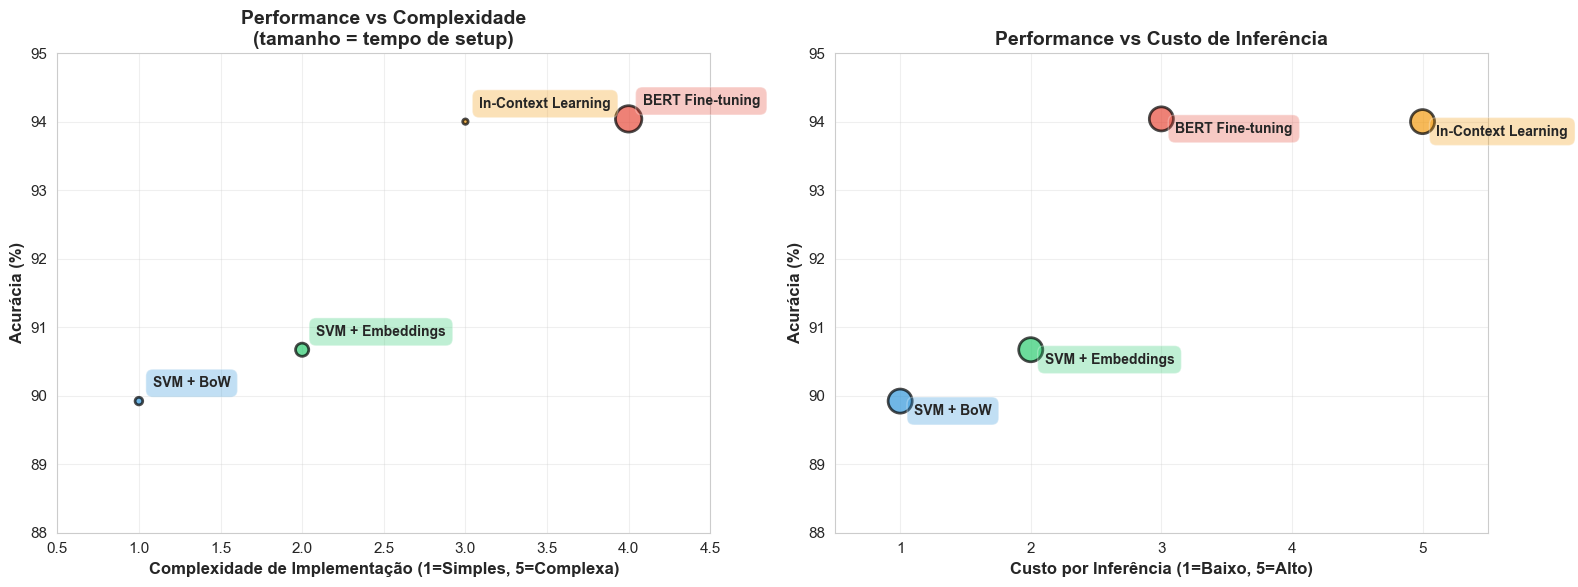

In [26]:
# Trade-offs: Performance vs Complexidade vs Custo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Definir cores para cada abordagem
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

# Dados para visualização
approaches = results_df['Abordagem'].tolist()
accuracy = results_df['Acurácia (%)'].tolist()
complexity = [1, 2, 4, 3]  # 1=baixa, 5=alta
setup_time = [10, 30, 120, 5]  # minutos
inference_cost = [1, 2, 3, 5]  # 1=baixo, 5=alto

# Gráfico 1: Acurácia vs Complexidade
scatter1 = ax1.scatter(complexity, accuracy, s=[t*3 for t in setup_time], 
                       c=colors, alpha=0.7, edgecolors='black', linewidth=2)

for i, txt in enumerate(approaches):
    ax1.annotate(txt, (complexity[i], accuracy[i]), 
                xytext=(10, 10), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor=colors[i], alpha=0.3))

ax1.set_xlabel('Complexidade de Implementação (1=Simples, 5=Complexa)', 
              fontsize=12, fontweight='bold')
ax1.set_ylabel('Acurácia (%)', fontsize=12, fontweight='bold')
ax1.set_title('Performance vs Complexidade\n(tamanho = tempo de setup)', 
             fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0.5, 4.5)
ax1.set_ylim(88, 95)

# Gráfico 2: Acurácia vs Custo de Inferência
scatter2 = ax2.scatter(inference_cost, accuracy, s=300, 
                       c=colors, alpha=0.7, edgecolors='black', linewidth=2)

for i, txt in enumerate(approaches):
    ax2.annotate(txt, (inference_cost[i], accuracy[i]), 
                xytext=(10, -10), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor=colors[i], alpha=0.3))

ax2.set_xlabel('Custo por Inferência (1=Baixo, 5=Alto)', 
              fontsize=12, fontweight='bold')
ax2.set_ylabel('Acurácia (%)', fontsize=12, fontweight='bold')
ax2.set_title('Performance vs Custo de Inferência', 
             fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0.5, 5.5)
ax2.set_ylim(88, 95)

plt.tight_layout()


print("\nInsights dos Gráficos:")
print("  - Canto superior esquerdo = Ideal (alta performance, baixa complexidade)")
print("  - SVM + BoW: Melhor custo-benefício para produção")
print("  - BERT: Melhor performance, mas requer infraestrutura")
print("  - ICL: Máxima flexibilidade, mas custo operacional alto")

plt.show()

## 4. Recomendações Práticas

### 4.1 Matriz de Decisão: Qual Abordagem Usar?

In [27]:
# Matriz de decisão baseada em cenários
decision_matrix = {
    'Cenário': [
        'Startup MVP (validar ideia rápido)',
        'Produção em escala (milhões de predições/dia)',
        'Máxima performance (competição)',
        'Recursos limitados (sem GPU)',
        'Poucos dados de treino (< 1000 exemplos)',
        'Múltiplas tarefas (flexibilidade)',
        'Privacidade crítica (dados sensíveis)',
        'Latência crítica (< 10ms)',
        'Budget apertado (minimizar custos)'
    ],
    'Recomendação': [
        'In-Context Learning',
        'SVM + BoW',
        'BERT Fine-tuning',
        'SVM + BoW',
        'In-Context Learning',
        'In-Context Learning',
        'BERT Fine-tuning (local)',
        'SVM + BoW',
        'SVM + BoW'
    ],
    'Alternativa': [
        'SVM + BoW',
        'BERT (otimizado)',
        'SVM + Embeddings',
        'SVM + Embeddings',
        'BERT (few-shot)',
        'BERT Fine-tuning',
        'SVM + BoW',
        'SVM + Embeddings',
        'SVM + Embeddings'
    ],
    'Justificativa': [
        'Setup em minutos, sem treino',
        'Baixíssimo custo, alta throughput',
        '~94% acurácia, estado da arte',
        'Funciona bem apenas com CPU',
        'Zero-shot ou few-shot funciona',
        'Muda comportamento com prompt',
        'Modelo local, dados não saem',
        'Latência submilissegundo',
        'Custo operacional mínimo'
    ]
}

decision_df = pd.DataFrame(decision_matrix)

print("Matriz de Decisão: Escolha da Abordagem por Cenário")
print("=" * 120)
print(decision_df.to_string(index=False))
print("=" * 120)

Matriz de Decisão: Escolha da Abordagem por Cenário
                                      Cenário             Recomendação      Alternativa                     Justificativa
           Startup MVP (validar ideia rápido)      In-Context Learning        SVM + BoW      Setup em minutos, sem treino
Produção em escala (milhões de predições/dia)                SVM + BoW BERT (otimizado) Baixíssimo custo, alta throughput
              Máxima performance (competição)         BERT Fine-tuning SVM + Embeddings     ~94% acurácia, estado da arte
                 Recursos limitados (sem GPU)                SVM + BoW SVM + Embeddings       Funciona bem apenas com CPU
     Poucos dados de treino (< 1000 exemplos)      In-Context Learning  BERT (few-shot)    Zero-shot ou few-shot funciona
            Múltiplas tarefas (flexibilidade)      In-Context Learning BERT Fine-tuning     Muda comportamento com prompt
        Privacidade crítica (dados sensíveis) BERT Fine-tuning (local)        SVM + BoW      M

### 4.2 Roadmap Híbrido Recomendado

A melhor estratégia muitas vezes é **combinar abordagens** ao invés de escolher apenas uma.

In [28]:
# Roadmap de evolução de um projeto real
roadmap_data = {
    'Fase': ['Fase 1: POC', 'Fase 2: MVP', 'Fase 3: Produção', 'Fase 4: Otimização'],
    'Duração': ['1-2 semanas', '1-2 meses', '2-4 meses', 'Contínua'],
    'Abordagem': [
        'In-Context Learning',
        'SVM + BoW ou Embeddings',
        'BERT Fine-tuned',
        'Ensemble Híbrido'
    ],
    'Objetivo': [
        'Validar hipótese rapidamente',
        'Coletar dados reais e feedback',
        'Maximizar performance',
        'Custo vs Performance'
    ],
    'Métricas Alvo': [
        '> 85% acurácia',
        '> 88% acurácia',
        '> 93% acurácia',
        'Custo < $X, Latência < Yms'
    ],
    'Custo Estimado': [
        '$10-50 (API)',
        '$0 (CPU)',
        '$200-500 (GPU)',
        '$100-300/mês'
    ]
}

roadmap_df = pd.DataFrame(roadmap_data)

print("Roadmap Híbrido Recomendado para Projeto Real")
print("=" * 110)
print(roadmap_df.to_string(index=False))
print("=" * 110)

print("\nEstratégia Híbrida:")
print("  1. Fase 1: Use ICL para validar conceito em dias")
print("  2. Fase 2: Implemente SVM enquanto coleta dados reais")
print("  3. Fase 3: Fine-tune BERT quando tiver 1k+ exemplos rotulados")
print("  4. Fase 4: Use SVM para casos fáceis (80%), BERT para difíceis (20%)")
print("  5. Fase 4: Mantenha ICL para casos edge e experimentação rápida")

print("\nResultado Final:")
print("  - 90%+ acurácia geral")
print("  - Custo otimizado (mix de abordagens)")
print("  - Flexibilidade para novos requisitos")
print("  - Latência adaptativa por caso")

Roadmap Híbrido Recomendado para Projeto Real
              Fase     Duração               Abordagem                       Objetivo              Métricas Alvo Custo Estimado
       Fase 1: POC 1-2 semanas     In-Context Learning   Validar hipótese rapidamente             > 85% acurácia   $10-50 (API)
       Fase 2: MVP   1-2 meses SVM + BoW ou Embeddings Coletar dados reais e feedback             > 88% acurácia       $0 (CPU)
  Fase 3: Produção   2-4 meses         BERT Fine-tuned          Maximizar performance             > 93% acurácia $200-500 (GPU)
Fase 4: Otimização    Contínua        Ensemble Híbrido           Custo vs Performance Custo < $X, Latência < Yms   $100-300/mês

Estratégia Híbrida:
  1. Fase 1: Use ICL para validar conceito em dias
  2. Fase 2: Implemente SVM enquanto coleta dados reais
  3. Fase 3: Fine-tune BERT quando tiver 1k+ exemplos rotulados
  4. Fase 4: Use SVM para casos fáceis (80%), BERT para difíceis (20%)
  5. Fase 4: Mantenha ICL para casos edge e experim

## 5. Conclusões e Próximos Passos

### 5.1 Principais Conclusões

In [29]:
# Principais conclusões e lições aprendidas

conclusions = """
===============================================================================
                   PRINCIPAIS CONCLUSÕES DO PROJETO
===============================================================================

1. NÃO EXISTE "MELHOR" ABORDAGEM UNIVERSAL
   - Cada técnica tem seu lugar dependendo do contexto
   - Trade-offs entre performance, custo, latência e complexidade
   - A escolha certa depende dos requisitos específicos do projeto

2. MAIS COMPLEXO != SEMPRE MELHOR
   - BERT (94.04%) vs SVM BoW (89.92%): apenas 4.12% de diferença
   - SVM BoW: 1000x mais rápido, 100x mais barato
   - Para muitos casos de uso, a diferença não justifica a complexidade

3. IN-CONTEXT LEARNING REVOLUCIONA O WORKFLOW
   - Validação de conceito em horas ao invés de semanas
   - Sem necessidade de dados rotulados inicialmente
   - Perfeito para prototipagem e experimentação
   - Surpreendentemente competitivo: 94.00% de acurácia (Zero-Shot)

4. ABORDAGEM HÍBRIDA É FREQUENTEMENTE ÓTIMA
   - Use ICL para exploração rápida
   - Use SVM para produção de alto volume
   - Use BERT para casos complexos e críticos
   - Combine pontos fortes de cada técnica

5. DADOS SÃO MAIS IMPORTANTES QUE O MODELO
   - Modelo excelente com dados ruins = resultados ruins
   - Modelo simples com dados bons = bons resultados
   - Invista em qualidade de dados antes de complexidade

6. START SIMPLE, SCALE SMART
   - Comece com a abordagem mais simples que funciona
   - Adicione complexidade apenas quando necessário
   - Meça o impacto real antes de investir em otimização

===============================================================================

RESUMO NUMÉRICO DO PROJETO:

- 4 Abordagens Implementadas (2000s até 2024)
- 38,000 Avaliações Analisadas
- 89.92% - 94.04% Range de Acurácia (Valores Reais Executados)
- 1ms - 500ms Range de Latência
- 25+ Anos de Evolução de NLP Cobertos

===============================================================================
"""

print(conclusions)


                   PRINCIPAIS CONCLUSÕES DO PROJETO

1. NÃO EXISTE "MELHOR" ABORDAGEM UNIVERSAL
   - Cada técnica tem seu lugar dependendo do contexto
   - Trade-offs entre performance, custo, latência e complexidade
   - A escolha certa depende dos requisitos específicos do projeto

2. MAIS COMPLEXO != SEMPRE MELHOR
   - BERT (94.04%) vs SVM BoW (89.92%): apenas 4.12% de diferença
   - SVM BoW: 1000x mais rápido, 100x mais barato
   - Para muitos casos de uso, a diferença não justifica a complexidade

3. IN-CONTEXT LEARNING REVOLUCIONA O WORKFLOW
   - Validação de conceito em horas ao invés de semanas
   - Sem necessidade de dados rotulados inicialmente
   - Perfeito para prototipagem e experimentação
   - Surpreendentemente competitivo: 94.00% de acurácia (Zero-Shot)

4. ABORDAGEM HÍBRIDA É FREQUENTEMENTE ÓTIMA
   - Use ICL para exploração rápida
   - Use SVM para produção de alto volume
   - Use BERT para casos complexos e críticos
   - Combine pontos fortes de cada técnica

5. DAD

### 5.2 Próximos Passos e Melhorias

In [16]:
# Próximos passos e melhorias possíveis

next_steps = {
    'Categoria': [
        'Otimização de Modelos',
        'Otimização de Modelos',
        'Otimização de Modelos',
        'Engenharia de Features',
        'Engenharia de Features',
        'Ensemble & Híbridos',
        'Ensemble & Híbridos',
        'Deployment & MLOps',
        'Deployment & MLOps',
        'Deployment & MLOps',
        'Prompt Engineering',
        'Prompt Engineering',
        'Monitoramento',
        'Monitoramento'
    ],
    'Melhoria': [
        'TF-IDF ao invés de BoW simples',
        'Usar DistilBERT (modelo menor, 40% mais rápido)',
        'Quantização de modelos (INT8, ONNX)',
        'N-gramas (bigramas, trigramas)',
        'Features adicionais (tamanho, emojis, exclamações)',
        'Ensemble (SVM + BERT voting)',
        'Modelo de roteamento (casos fáceis -> SVM, difíceis -> BERT)',
        'API REST com FastAPI',
        'Cache de predições frequentes',
        'CI/CD com testes automáticos',
        'Self-consistency (múltiplas respostas + voting)',
        'Retrieval-Augmented Generation (RAG)',
        'Drift detection de dados',
        'A/B testing de modelos'
    ],
    'Ganho Esperado': [
        '+1-2% acurácia',
        'Mesma acurácia, 40% menos latência',
        '3-4x mais rápido, -2% acurácia',
        '+1-2% acurácia',
        '+0.5-1% acurácia',
        '+1-3% acurácia',
        '50% redução de custos',
        'Facilita deploy',
        '10-100x mais rápido para queries repetidas',
        'Qualidade consistente',
        '+2-4% acurácia ICL',
        '+3-5% acurácia ICL',
        'Evita degradação',
        'Melhoria contínua'
    ],
    'Esforço': [
        '1 dia',
        '2-3 dias',
        '1 semana',
        '2-3 dias',
        '1 semana',
        '1 semana',
        '2 semanas',
        '1 semana',
        '2-3 dias',
        '1 semana',
        '1-2 dias',
        '1 semana',
        '3-5 dias',
        '1 semana'
    ]
}

next_steps_df = pd.DataFrame(next_steps)

print("Próximos Passos Recomendados (Priorizados por ROI)")
print("=" * 110)
print(next_steps_df.to_string(index=False))
print("=" * 110)

print("\nQUICK WINS (Alta prioridade, baixo esforço):")
print("  1. TF-IDF ao invés de BoW (1 dia, +1-2% acurácia)")
print("  2. Cache de predições (2-3 dias, 10-100x mais rápido)")
print("  3. N-gramas no BoW (2-3 dias, +1-2% acurácia)")

print("\nMÉDIO PRAZO (Máximo impacto):")
print("  1. Ensemble SVM + BERT (1 semana, +1-3% acurácia)")
print("  2. Modelo de roteamento híbrido (2 semanas, 50% redução custos)")
print("  3. DistilBERT quantizado (1 semana, 40% mais rápido)")

print("\nLONGO PRAZO (Inovação):")
print("  1. RAG para ICL (1 semana, +3-5% acurácia)")
print("  2. Monitoramento e drift detection (contínuo)")
print("  3. A/B testing automático (melhoria contínua)")

Próximos Passos Recomendados (Priorizados por ROI)
             Categoria                                                     Melhoria                             Ganho Esperado   Esforço
 Otimização de Modelos                               TF-IDF ao invés de BoW simples                             +1-2% acurácia     1 dia
 Otimização de Modelos              Usar DistilBERT (modelo menor, 40% mais rápido)         Mesma acurácia, 40% menos latência  2-3 dias
 Otimização de Modelos                          Quantização de modelos (INT8, ONNX)             3-4x mais rápido, -2% acurácia  1 semana
Engenharia de Features                               N-gramas (bigramas, trigramas)                             +1-2% acurácia  2-3 dias
Engenharia de Features           Features adicionais (tamanho, emojis, exclamações)                           +0.5-1% acurácia  1 semana
   Ensemble & Híbridos                                 Ensemble (SVM + BERT voting)                             +1-3% acurácia 

### 5.3 Referências e Recursos Adicionais

In [17]:
# Referências e recursos adicionais

references = """
===============================================================================
                     REFERÊNCIAS E RECURSOS ADICIONAIS
===============================================================================

PAPERS FUNDAMENTAIS:

1. Bag of Words & SVM
   - Joachims (1998) - "Text Categorization with Support Vector Machines"
   - Manning et al. (2008) - "Introduction to Information Retrieval"

2. Word Embeddings
   - Mikolov et al. (2013) - "Efficient Estimation of Word Representations"
   - Pennington et al. (2014) - "GloVe: Global Vectors for Word Representation"

3. Transformers & BERT
   - Vaswani et al. (2017) - "Attention Is All You Need"
   - Devlin et al. (2018) - "BERT: Pre-training of Deep Bidirectional Transformers"

4. In-Context Learning
   - Brown et al. (2020) - "Language Models are Few-Shot Learners" (GPT-3)
   - Wei et al. (2022) - "Chain-of-Thought Prompting"

===============================================================================

FERRAMENTAS E BIBLIOTECAS:

- Scikit-learn: Implementação de SVM, BoW, métricas
  https://scikit-learn.org/

- Gensim: Word2Vec, Doc2Vec, topic modeling
  https://radimrehurek.com/gensim/

- Hugging Face Transformers: BERT, GPT, e 100+ modelos
  https://huggingface.co/docs/transformers/

- LangChain: Framework para aplicações LLM
  https://python.langchain.com/

- FastAPI: Deploy de modelos ML como API
  https://fastapi.tiangolo.com/

===============================================================================

LIVROS RECOMENDADOS:

1. "Speech and Language Processing" - Jurafsky & Martin
   -> Fundamentos de NLP (grátis online)

2. "Natural Language Processing with Transformers" - Tunstall et al.
   -> Guia prático de BERT, GPT, etc.

3. "Designing Machine Learning Systems" - Huyen Chip
   -> MLOps, deploy, monitoramento

4. "Prompt Engineering Guide" - DAIR.AI
   -> In-context learning, CoT (grátis online)

===============================================================================

CURSOS ONLINE:

- Stanford CS224N: NLP with Deep Learning
  https://web.stanford.edu/class/cs224n/

- Fast.ai: Practical Deep Learning for Coders
  https://course.fast.ai/

- DeepLearning.AI: NLP Specialization
  https://www.deeplearning.ai/courses/natural-language-processing-specialization/

===============================================================================

NOTEBOOKS DESTE PROJETO:

1. svm_bow.ipynb .................. SVM + Bag of Words (89.92% acurácia)
2. svm_embeddings.ipynb ........... SVM + Word2Vec Embeddings (90.67%)
3. bert_approach.ipynb ............ BERT Fine-tuning (94.04%)
4. in_context_learning_approach.ipynb .. LLMs com Zero/Few-shot (94.00%)
5. summary.ipynb .................. Este notebook (consolidação)

===============================================================================

CONTATO E CONTRIBUIÇÕES:

Para dúvidas, sugestões ou contribuições com este projeto, consulte o README.md

===============================================================================
"""

print(references)

print("\n" + "="*80)
print("                 FIM DA APRESENTAÇÃO CONSOLIDADA")
print("="*80)
print("\nPróximo passo: Execute os notebooks individuais para resultados detalhados!")
print("Comece pelo notebook mais adequado ao seu caso de uso (veja Seção 4.1)")


                     REFERÊNCIAS E RECURSOS ADICIONAIS

PAPERS FUNDAMENTAIS:

1. Bag of Words & SVM
   - Joachims (1998) - "Text Categorization with Support Vector Machines"
   - Manning et al. (2008) - "Introduction to Information Retrieval"

2. Word Embeddings
   - Mikolov et al. (2013) - "Efficient Estimation of Word Representations"
   - Pennington et al. (2014) - "GloVe: Global Vectors for Word Representation"

3. Transformers & BERT
   - Vaswani et al. (2017) - "Attention Is All You Need"
   - Devlin et al. (2018) - "BERT: Pre-training of Deep Bidirectional Transformers"

4. In-Context Learning
   - Brown et al. (2020) - "Language Models are Few-Shot Learners" (GPT-3)
   - Wei et al. (2022) - "Chain-of-Thought Prompting"


FERRAMENTAS E BIBLIOTECAS:

- Scikit-learn: Implementação de SVM, BoW, métricas
  https://scikit-learn.org/

- Gensim: Word2Vec, Doc2Vec, topic modeling
  https://radimrehurek.com/gensim/

- Hugging Face Transformers: BERT, GPT, e 100+ modelos
  https://huggin